In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
 
from itertools import product
from tqdm import tqdm_notebook

import Model_Evaluation as me

In [2]:
books = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
#books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv')
#books = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Books_ext_fs.csv')
# books = pd.read_csv('C:/Users/Sword Guo/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Books_ext_fs.csv')
sales = books[['Year_Month','Sum of Sales']]
sales['Sum of Sales'] = sales['Sum of Sales']/100000
sales

,Year_Month,Sum of Sales
0,2008-01,2.826041
1,2008-02,2.624744
2,2008-03,3.260597
3,2008-04,2.153875
4,2008-05,4.995599
...,...,...
150,2020-07,1.503481
151,2020-08,1.560669
152,2020-09,4.687110
153,2020-10,11.184468


In [3]:
train,test = train_test_split(sales, test_size=0.075, random_state=60616, shuffle=False)

In [4]:
print(train.shape, test.shape)

(143, 2) (12, 2)


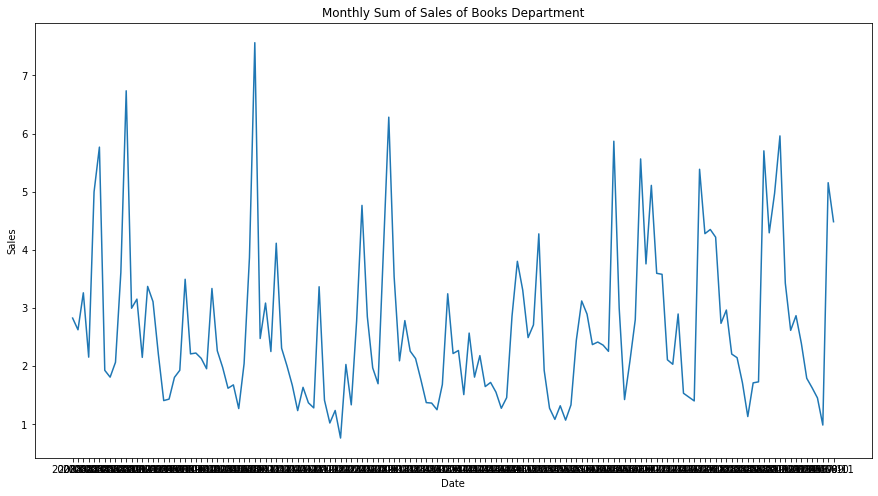

In [6]:
plt.figure(figsize=[15,8])
plt.plot(train['Year_Month'],train['Sum of Sales'])
plt.title('Monthly Sum of Sales of Books Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [8]:
ad_fuller_result = adfuller(train['Sum of Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.448654278403226
p-value: 5.74799439008589e-11


Since the p-value is greater than 0.5, we cannot reject null hypothesis and must assume that the series is not stationary.

sales['sales_diffed'] = sales['Sum of Sales'].diff(1)
sales

ad_fuller_result = adfuller(sales['sales_diffed'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

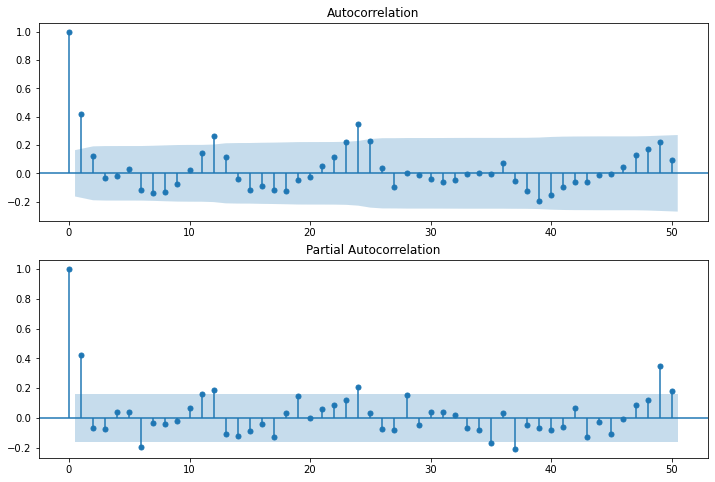

In [9]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(train['Sum of Sales'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train['Sum of Sales'], lags=50, ax=ax[1])
plt.show()

# New Section

In [7]:
p = [0,1,2]
d = [0,1]
q = [0,1,2]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

df = pd.DataFrame()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['Sum of Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))

            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
            print(" ")
        except:
            continue
df.columns = ['param','param_seasonal', 'AIC']

ARIMA(0, 0, 0)x(0, 0, 0, 12)- AIC:717.5785292318133
 
ARIMA(0, 0, 0)x(0, 0, 1, 12)- AIC:653.5776806010629
 
ARIMA(0, 0, 0)x(0, 0, 2, 12)- AIC:594.7474520582173
 
ARIMA(0, 0, 0)x(0, 1, 0, 12)- AIC:483.8512941947081
 
ARIMA(0, 0, 0)x(0, 1, 1, 12)- AIC:436.1450288942724
 
ARIMA(0, 0, 0)x(0, 1, 2, 12)- AIC:436.7889809562348
 
ARIMA(0, 0, 0)x(1, 0, 0, 12)- AIC:542.1055882327287
 
ARIMA(0, 0, 0)x(1, 0, 1, 12)- AIC:497.6837062308779
 
ARIMA(0, 0, 0)x(1, 0, 2, 12)- AIC:499.1656035623493
 
ARIMA(0, 0, 0)x(1, 1, 0, 12)- AIC:436.33447412408987
 
ARIMA(0, 0, 0)x(1, 1, 1, 12)- AIC:435.24656819482936
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 2, 12)- AIC:429.56969594082886
 
ARIMA(0, 0, 0)x(2, 0, 0, 12)- AIC:498.6383187707968
 
ARIMA(0, 0, 0)x(2, 0, 1, 12)- AIC:497.82863903738075
 
ARIMA(0, 0, 0)x(2, 0, 2, 12)- AIC:491.70787081081653
 
ARIMA(0, 0, 0)x(2, 1, 0, 12)- AIC:437.07859589575196
 
ARIMA(0, 0, 0)x(2, 1, 1, 12)- AIC:432.50107436354597
 
ARIMA(0, 0, 0)x(2, 1, 2, 12)- AIC:430.55938623930587
 
ARIMA(0, 0, 1)x(0, 0, 0, 12)- AIC:616.540653645201
 
ARIMA(0, 0, 1)x(0, 0, 1, 12)- AIC:575.7984382033728
 
ARIMA(0, 0, 1)x(0, 0, 2, 12)- AIC:550.1178769261276
 
ARIMA(0, 0, 1)x(0, 1, 0, 12)- AIC:468.09585161132003
 
ARIMA(0, 0, 1)x(0, 1, 1, 12)- AIC:421.4379005687948
 
ARIMA(0, 0, 1)x(0, 1, 2, 12)- AIC:422.50554435331804
 
ARIMA(0, 0, 1)x(1, 0, 0, 12)- AIC:515.9774994520874
 
ARIMA(0, 0, 1)x(1, 0, 1, 12)- AIC:476.23130553895135
 
ARIMA(0, 0, 1)x(1, 0, 2, 12)- AIC:477.85528903183234
 
ARIMA(0, 0, 1)x(1, 1, 0, 12)- AIC:427.43408430181154
 
ARIMA(0, 0, 1)x(1, 1, 1, 12)- AIC:422.0965499619325
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 2, 12)- AIC:420.05199029958305
 
ARIMA(0, 0, 1)x(2, 0, 0, 12)- AIC:483.0152871379713
 
ARIMA(0, 0, 1)x(2, 0, 1, 12)- AIC:477.58738974485584
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 0, 2, 12)- AIC:475.7409030190727
 
ARIMA(0, 0, 1)x(2, 1, 0, 12)- AIC:424.6037038709144
 
ARIMA(0, 0, 1)x(2, 1, 1, 12)- AIC:422.07099623959147
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 1, 2, 12)- AIC:421.98116125318654
 
ARIMA(0, 0, 2)x(0, 0, 0, 12)- AIC:567.6583567927687
 
ARIMA(0, 0, 2)x(0, 0, 1, 12)- AIC:538.6911657733333
 
ARIMA(0, 0, 2)x(0, 0, 2, 12)- AIC:524.0138053672895
 
ARIMA(0, 0, 2)x(0, 1, 0, 12)- AIC:464.2921197564626
 
ARIMA(0, 0, 2)x(0, 1, 1, 12)- AIC:420.63543303024164
 
ARIMA(0, 0, 2)x(0, 1, 2, 12)- AIC:422.00968685384294
 
ARIMA(0, 0, 2)x(1, 0, 0, 12)- AIC:504.00333484174126
 
ARIMA(0, 0, 2)x(1, 0, 1, 12)- AIC:472.03968516499305
 
ARIMA(0, 0, 2)x(1, 0, 2, 12)- AIC:473.86996395386757
 
ARIMA(0, 0, 2)x(1, 1, 0, 12)- AIC:427.7429456495681
 
ARIMA(0, 0, 2)x(1, 1, 1, 12)- AIC:421.76322236003705
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 1, 2, 12)- AIC:420.76483938001843
 
ARIMA(0, 0, 2)x(2, 0, 0, 12)- AIC:479.32912973316616
 
ARIMA(0, 0, 2)x(2, 0, 1, 12)- AIC:473.76777594931207
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 2, 12)- AIC:473.5402669629499
 
ARIMA(0, 0, 2)x(2, 1, 0, 12)- AIC:424.0142784313432
 
ARIMA(0, 0, 2)x(2, 1, 1, 12)- AIC:422.1076252022276
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 1, 2, 12)- AIC:422.7282534940165
 
ARIMA(0, 1, 0)x(0, 0, 0, 12)- AIC:505.76167963247605
 
ARIMA(0, 1, 0)x(0, 0, 1, 12)- AIC:500.5105559352937
 
ARIMA(0, 1, 0)x(0, 0, 2, 12)- AIC:497.5379106555397
 
ARIMA(0, 1, 0)x(0, 1, 0, 12)- AIC:504.07080436590735
 
ARIMA(0, 1, 0)x(0, 1, 1, 12)- AIC:462.50966991726864
 
ARIMA(0, 1, 0)x(0, 1, 2, 12)- AIC:464.3480975563606
 
ARIMA(0, 1, 0)x(1, 0, 0, 12)- AIC:497.55136030967446
 
ARIMA(0, 1, 0)x(1, 0, 1, 12)- AIC:492.60428768181123
 
ARIMA(0, 1, 0)x(1, 0, 2, 12)- AIC:493.9941980065552
 
ARIMA(0, 1, 0)x(1, 1, 0, 12)- AIC:476.2807562143168
 
ARIMA(0, 1, 0)x(1, 1, 1, 12)- AIC:464.3608388773117
 
ARIMA(0, 1, 0)x(1, 1, 2, 12)- AIC:466.5096564170599
 
ARIMA(0, 1, 0)x(2, 0, 0, 12)- AIC:494.1598686988948
 
ARIMA(0, 1, 0)x(2, 0, 1, 12)- AIC:494.2111508613178
 
ARIMA(0, 1, 0)x(2, 0, 2, 12)- AIC:495.40577568288575
 
ARIMA(0, 1, 0)x(2, 1, 0, 12)- AIC:463.0025483810262
 
ARIMA(0, 1, 0)x(2, 1, 1, 12)- AIC:464.9872716322725
 
ARIMA(0, 1, 0)x(2, 1, 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 2, 12)- AIC:427.0470371795775
 
ARIMA(0, 1, 1)x(2, 0, 0, 12)- AIC:462.24985292139803
 
ARIMA(0, 1, 1)x(2, 0, 1, 12)- AIC:464.08317475544493
 
ARIMA(0, 1, 1)x(2, 0, 2, 12)- AIC:459.083995912402
 
ARIMA(0, 1, 1)x(2, 1, 0, 12)- AIC:435.25885005737985
 
ARIMA(0, 1, 1)x(2, 1, 1, 12)- AIC:431.39669451310976
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 1, 2, 12)- AIC:428.8603236115489
 
ARIMA(0, 1, 2)x(0, 0, 0, 12)- AIC:469.51004413352234
 
ARIMA(0, 1, 2)x(0, 0, 1, 12)- AIC:465.25159364753483
 
ARIMA(0, 1, 2)x(0, 0, 2, 12)- AIC:455.0456845342337
 
ARIMA(0, 1, 2)x(0, 1, 0, 12)- AIC:473.5890459395667
 
ARIMA(0, 1, 2)x(0, 1, 1, 12)- AIC:424.03085348839454
 
ARIMA(0, 1, 2)x(0, 1, 2, 12)- AIC:424.68736298940615
 
ARIMA(0, 1, 2)x(1, 0, 0, 12)- AIC:460.942542558069
 
ARIMA(0, 1, 2)x(1, 0, 1, 12)- AIC:451.5271907928605
 
ARIMA(0, 1, 2)x(1, 0, 2, 12)- AIC:451.79282776497513
 
ARIMA(0, 1, 2)x(1, 1, 0, 12)- AIC:431.09509224536987
 
ARIMA(0, 1, 2)x(1, 1, 1, 12)- AIC:424.3415357007433
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 1, 2, 12)- AIC:422.0887533837864
 
ARIMA(0, 1, 2)x(2, 0, 0, 12)- AIC:450.0430327901122
 
ARIMA(0, 1, 2)x(2, 0, 1, 12)- AIC:451.4474589536363
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 0, 2, 12)- AIC:450.4589945295737
 
ARIMA(0, 1, 2)x(2, 1, 0, 12)- AIC:427.6647639945692
 
ARIMA(0, 1, 2)x(2, 1, 1, 12)- AIC:425.5790961916398
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 2, 12)- AIC:424.08613214616906
 
ARIMA(1, 0, 0)x(0, 0, 0, 12)- AIC:504.80530019614923
 
ARIMA(1, 0, 0)x(0, 0, 1, 12)- AIC:496.5800387279045
 
ARIMA(1, 0, 0)x(0, 0, 2, 12)- AIC:491.2641210399845
 
ARIMA(1, 0, 0)x(0, 1, 0, 12)- AIC:462.7428019766123
 
ARIMA(1, 0, 0)x(0, 1, 1, 12)- AIC:418.2553062023504
 
ARIMA(1, 0, 0)x(0, 1, 2, 12)- AIC:419.68532978455505
 
ARIMA(1, 0, 0)x(1, 0, 0, 12)- AIC:489.8059545759264
 
ARIMA(1, 0, 0)x(1, 0, 1, 12)- AIC:467.4400937080941
 
ARIMA(1, 0, 0)x(1, 0, 2, 12)- AIC:469.3288494760494
 
ARIMA(1, 0, 0)x(1, 1, 0, 12)- AIC:425.86555395599817
 
ARIMA(1, 0, 0)x(1, 1, 1, 12)- AIC:419.4774161117422
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 2, 12)- AIC:418.56933507549786
 
ARIMA(1, 0, 0)x(2, 0, 0, 12)- AIC:475.52851970860894
 
ARIMA(1, 0, 0)x(2, 0, 1, 12)- AIC:469.28000177170566
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 0, 2, 12)- AIC:469.6364040971881
 
ARIMA(1, 0, 0)x(2, 1, 0, 12)- AIC:421.81672779314204
 
ARIMA(1, 0, 0)x(2, 1, 1, 12)- AIC:419.9693871298783
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 1, 2, 12)- AIC:420.5266958968002
 
ARIMA(1, 0, 1)x(0, 0, 0, 12)- AIC:496.02314216606857
 
ARIMA(1, 0, 1)x(0, 0, 1, 12)- AIC:486.66778787846295
 
ARIMA(1, 0, 1)x(0, 0, 2, 12)- AIC:476.6547934396959
 
ARIMA(1, 0, 1)x(0, 1, 0, 12)- AIC:463.6148908707023
 
ARIMA(1, 0, 1)x(0, 1, 1, 12)- AIC:419.94763208176687
 
ARIMA(1, 0, 1)x(0, 1, 2, 12)- AIC:421.48786338117884
 
ARIMA(1, 0, 1)x(1, 0, 0, 12)- AIC:478.73299893301544
 
ARIMA(1, 0, 1)x(1, 0, 1, 12)- AIC:463.8428176004993
 
ARIMA(1, 0, 1)x(1, 0, 2, 12)- AIC:465.81792579822053
 
ARIMA(1, 0, 1)x(1, 1, 0, 12)- AIC:427.7529713414497
 
ARIMA(1, 0, 1)x(1, 1, 1, 12)- AIC:421.3041887967916
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 2, 12)- AIC:420.4842835779659
 
ARIMA(1, 0, 1)x(2, 0, 0, 12)- AIC:467.43108706894543
 
ARIMA(1, 0, 1)x(2, 0, 1, 12)- AIC:465.7956508168735
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 2, 12)- AIC:465.1338886780476
 
ARIMA(1, 0, 1)x(2, 1, 0, 12)- AIC:423.7387093048287
 
ARIMA(1, 0, 1)x(2, 1, 1, 12)- AIC:421.7235283946159
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 1, 2, 12)- AIC:422.43392608606206
 
ARIMA(1, 0, 2)x(0, 0, 0, 12)- AIC:476.3836757099993
 
ARIMA(1, 0, 2)x(0, 0, 1, 12)- AIC:472.07909625077866
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(0, 0, 2, 12)- AIC:461.85868203778
 
ARIMA(1, 0, 2)x(0, 1, 0, 12)- AIC:465.36513188070944
 
ARIMA(1, 0, 2)x(0, 1, 1, 12)- AIC:421.22104720727066
 
ARIMA(1, 0, 2)x(0, 1, 2, 12)- AIC:422.7548328786131
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 0, 12)- AIC:467.7573698266589
 
ARIMA(1, 0, 2)x(1, 0, 1, 12)- AIC:458.6076119336629
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 2, 12)- AIC:458.6699203923788
 
ARIMA(1, 0, 2)x(1, 1, 0, 12)- AIC:429.484534816539
 
ARIMA(1, 0, 2)x(1, 1, 1, 12)- AIC:422.5931255413114
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 1, 2, 12)- AIC:421.6523382402084
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 0, 12)- AIC:456.9038869954911
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12)- AIC:458.39142023002154
 
ARIMA(1, 0, 2)x(2, 0, 2, 12)- AIC:457.1574516972315
 
ARIMA(1, 0, 2)x(2, 1, 0, 12)- AIC:425.2555977300607
 
ARIMA(1, 0, 2)x(2, 1, 1, 12)- AIC:423.2992479788086
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 1, 2, 12)- AIC:423.59430505206376
 
ARIMA(1, 1, 0)x(0, 0, 0, 12)- AIC:498.66872186641876
 
ARIMA(1, 1, 0)x(0, 0, 1, 12)- AIC:491.5914135940898
 
ARIMA(1, 1, 0)x(0, 0, 2, 12)- AIC:486.09058899240074
 
ARIMA(1, 1, 0)x(0, 1, 0, 12)- AIC:488.37407181402307
 
ARIMA(1, 1, 0)x(0, 1, 1, 12)- AIC:448.5177037444215
 
ARIMA(1, 1, 0)x(0, 1, 2, 12)- AIC:450.4768400951365
 
ARIMA(1, 1, 0)x(1, 0, 0, 12)- AIC:486.8173002299924
 
ARIMA(1, 1, 0)x(1, 0, 1, 12)- AIC:479.83989233172883
 
ARIMA(1, 1, 0)x(1, 0, 2, 12)- AIC:481.5157555489641
 
ARIMA(1, 1, 0)x(1, 1, 0, 12)- AIC:459.95342323142154
 
ARIMA(1, 1, 0)x(1, 1, 1, 12)- AIC:450.4691383383361
 
ARIMA(1, 1, 0)x(1, 1, 2, 12)- AIC:452.4456592734215
 
ARIMA(1, 1, 0)x(2, 0, 0, 12)- AIC:481.2007765386674
 
ARIMA(1, 1, 0)x(2, 0, 1, 12)- AIC:481.530893890666
 
ARIMA(1, 1, 0)x(2, 0, 2, 12)- AIC:483.51549576464
 
ARIMA(1, 1, 0)x(2, 1, 0, 12)- AIC:452.3934775176234
 
ARIMA(1, 1, 0)x(2, 1, 1, 12)- AIC:451.96932590199094
 
ARIMA(1, 1, 0)x(2, 1, 2,

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 2, 12)- AIC:421.8236717636061
 
ARIMA(1, 1, 1)x(2, 0, 0, 12)- AIC:447.4087739816495
 
ARIMA(1, 1, 1)x(2, 0, 1, 12)- AIC:448.47337593702684
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 0, 2, 12)- AIC:448.55327095671146
 
ARIMA(1, 1, 1)x(2, 1, 0, 12)- AIC:425.91204103447416
 
ARIMA(1, 1, 1)x(2, 1, 1, 12)- AIC:424.5851026701632
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 1, 2, 12)- AIC:423.82369251329817
 
ARIMA(1, 1, 2)x(0, 0, 0, 12)- AIC:468.1215620582001
 
ARIMA(1, 1, 2)x(0, 0, 1, 12)- AIC:462.85617435547204
 
ARIMA(1, 1, 2)x(0, 0, 2, 12)- AIC:454.3020902305982
 
ARIMA(1, 1, 2)x(0, 1, 0, 12)- AIC:466.6573168128638
 
ARIMA(1, 1, 2)x(0, 1, 1, 12)- AIC:424.34048298757284
 
ARIMA(1, 1, 2)x(0, 1, 2, 12)- AIC:425.43496575520203
 
ARIMA(1, 1, 2)x(1, 0, 0, 12)- AIC:458.32963469704305
 
ARIMA(1, 1, 2)x(1, 0, 1, 12)- AIC:449.8715409640531
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 2, 12)- AIC:450.4725237324393
 
ARIMA(1, 1, 2)x(1, 1, 0, 12)- AIC:431.9504384351919
 
ARIMA(1, 1, 2)x(1, 1, 1, 12)- AIC:425.21548563536504
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 2, 12)- AIC:423.79331933682676
 
ARIMA(1, 1, 2)x(2, 0, 0, 12)- AIC:449.37111826704574
 
ARIMA(1, 1, 2)x(2, 0, 1, 12)- AIC:450.42677687308833
 
ARIMA(1, 1, 2)x(2, 0, 2, 12)- AIC:450.5365004807285
 
ARIMA(1, 1, 2)x(2, 1, 0, 12)- AIC:427.90099306797254
 
ARIMA(1, 1, 2)x(2, 1, 1, 12)- AIC:426.56785415058624
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12)- AIC:425.8156311142114
 
ARIMA(2, 0, 0)x(0, 0, 0, 12)- AIC:500.9311715958813
 
ARIMA(2, 0, 0)x(0, 0, 1, 12)- AIC:492.07729316169747
 
ARIMA(2, 0, 0)x(0, 0, 2, 12)- AIC:485.1346427354207
 
ARIMA(2, 0, 0)x(0, 1, 0, 12)- AIC:463.7991444859648
 
ARIMA(2, 0, 0)x(0, 1, 1, 12)- AIC:420.03669365606
 
ARIMA(2, 0, 0)x(0, 1, 2, 12)- AIC:421.54191003286553
 
ARIMA(2, 0, 0)x(1, 0, 0, 12)- AIC:484.7399841484097
 
ARIMA(2, 0, 0)x(1, 0, 1, 12)- AIC:467.35032495275516
 
ARIMA(2, 0, 0)x(1, 0, 2, 12)- AIC:469.3143618568779
 
ARIMA(2, 0, 0)x(1, 1, 0, 12)- AIC:427.76137773721297
 
ARIMA(2, 0, 0)x(1, 1, 1, 12)- AIC:421.34958447173085
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(1, 1, 2, 12)- AIC:420.5097315428802
 
ARIMA(2, 0, 0)x(2, 0, 0, 12)- AIC:473.84883579177495
 
ARIMA(2, 0, 0)x(2, 0, 1, 12)- AIC:469.29385387553447
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 0, 2, 12)- AIC:469.8848337519328
 
ARIMA(2, 0, 0)x(2, 1, 0, 12)- AIC:423.751834532456
 
ARIMA(2, 0, 0)x(2, 1, 1, 12)- AIC:421.77538752750127
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 1, 2, 12)- AIC:422.4631459095699
 
ARIMA(2, 0, 1)x(0, 0, 0, 12)- AIC:473.2094974841102
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 1, 12)- AIC:467.70205379246624
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 2, 12)- AIC:459.12779090306947
 
ARIMA(2, 0, 1)x(0, 1, 0, 12)- AIC:465.35480471074
 
ARIMA(2, 0, 1)x(0, 1, 1, 12)- AIC:421.3682309448011
 
ARIMA(2, 0, 1)x(0, 1, 2, 12)- AIC:422.91677445483833
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 0, 12)- AIC:463.16055572068603
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 1, 12)- AIC:454.84881151014366
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 2, 12)- AIC:455.3966768114781
 
ARIMA(2, 0, 1)x(1, 1, 0, 12)- AIC:429.49713122980825
 
ARIMA(2, 0, 1)x(1, 1, 1, 12)- AIC:422.74983282943487
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 1, 2, 12)- AIC:421.72149876371986
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 0, 12)- AIC:454.2564451250766
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 1, 12)- AIC:455.79428467840705
 
ARIMA(2, 0, 1)x(2, 0, 2, 12)- AIC:455.957641721781
 
ARIMA(2, 0, 1)x(2, 1, 0, 12)- AIC:425.3753799134412
 
ARIMA(2, 0, 1)x(2, 1, 1, 12)- AIC:423.3605445064695
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 1, 2, 12)- AIC:423.7083819776316
 
ARIMA(2, 0, 2)x(0, 0, 0, 12)- AIC:474.90817172916627
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 1, 12)- AIC:469.66425334926123
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 2, 12)- AIC:461.1588829531537
 
ARIMA(2, 0, 2)x(0, 1, 0, 12)- AIC:467.3481728815038
 
ARIMA(2, 0, 2)x(0, 1, 1, 12)- AIC:423.220236291539
 
ARIMA(2, 0, 2)x(0, 1, 2, 12)- AIC:424.56858788062357
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 0, 12)- AIC:465.164477964532
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 1, 12)- AIC:456.7764627920336
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 2, 12)- AIC:457.6171984493582
 
ARIMA(2, 0, 2)x(1, 1, 0, 12)- AIC:429.78480388480205
 
ARIMA(2, 0, 2)x(1, 1, 1, 12)- AIC:424.3870875981604
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 1, 2, 12)- AIC:423.6599430503163
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 0, 12)- AIC:456.25914244501575
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12)- AIC:458.3752984976327
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 2, 12)- AIC:458.44775941915356
 
ARIMA(2, 0, 2)x(2, 1, 0, 12)- AIC:426.2955798253832
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 1, 1, 12)- AIC:425.2661386933943
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 1, 2, 12)- AIC:425.5876032498687
 
ARIMA(2, 1, 0)x(0, 0, 0, 12)- AIC:496.22218508743805
 
ARIMA(2, 1, 0)x(0, 0, 1, 12)- AIC:488.8273553062038
 
ARIMA(2, 1, 0)x(0, 0, 2, 12)- AIC:482.6033890528802
 
ARIMA(2, 1, 0)x(0, 1, 0, 12)- AIC:484.522345643537
 
ARIMA(2, 1, 0)x(0, 1, 1, 12)- AIC:441.99002854196016
 
ARIMA(2, 1, 0)x(0, 1, 2, 12)- AIC:443.8688770946486
 
ARIMA(2, 1, 0)x(1, 0, 0, 12)- AIC:483.5339344827401
 
ARIMA(2, 1, 0)x(1, 0, 1, 12)- AIC:474.4072726839753
 
ARIMA(2, 1, 0)x(1, 0, 2, 12)- AIC:476.2885480314262
 
ARIMA(2, 1, 0)x(1, 1, 0, 12)- AIC:453.8818408758616
 
ARIMA(2, 1, 0)x(1, 1, 1, 12)- AIC:443.8490687069194
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(1, 1, 2, 12)- AIC:444.22969122407545
 
ARIMA(2, 1, 0)x(2, 0, 0, 12)- AIC:476.63880601295534
 
ARIMA(2, 1, 0)x(2, 0, 1, 12)- AIC:476.2425425655739
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 0, 2, 12)- AIC:476.8286915982799
 
ARIMA(2, 1, 0)x(2, 1, 0, 12)- AIC:446.47805620629674
 
ARIMA(2, 1, 0)x(2, 1, 1, 12)- AIC:445.45392075252
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 1, 2, 12)- AIC:446.13031762715684
 
ARIMA(2, 1, 1)x(0, 0, 0, 12)- AIC:468.00917707507904
 
ARIMA(2, 1, 1)x(0, 0, 1, 12)- AIC:462.8457472246855
 
ARIMA(2, 1, 1)x(0, 0, 2, 12)- AIC:454.3002832145662
 
ARIMA(2, 1, 1)x(0, 1, 0, 12)- AIC:466.9571172083231
 
ARIMA(2, 1, 1)x(0, 1, 1, 12)- AIC:424.350440001666
 
ARIMA(2, 1, 1)x(0, 1, 2, 12)- AIC:425.4355164480719
 
ARIMA(2, 1, 1)x(1, 0, 0, 12)- AIC:458.328827136914
 
ARIMA(2, 1, 1)x(1, 0, 1, 12)- AIC:449.8755904929895
 
ARIMA(2, 1, 1)x(1, 0, 2, 12)- AIC:450.4716894970055
 
ARIMA(2, 1, 1)x(1, 1, 0, 12)- AIC:431.950523446533
 
ARIMA(2, 1, 1)x(1, 1, 1, 12)- AIC:425.2156803542551
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 2, 12)- AIC:423.7932374547715
 
ARIMA(2, 1, 1)x(2, 0, 0, 12)- AIC:449.3690896822443
 
ARIMA(2, 1, 1)x(2, 0, 1, 12)- AIC:450.42585105703114
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 0, 2, 12)- AIC:450.5381844768759
 
ARIMA(2, 1, 1)x(2, 1, 0, 12)- AIC:427.90196779507124
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 1, 12)- AIC:426.6628357110492
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 2, 12)- AIC:425.8684834427734
 
ARIMA(2, 1, 2)x(0, 0, 0, 12)- AIC:470.32440214333496
 
ARIMA(2, 1, 2)x(0, 0, 1, 12)- AIC:464.78997594175905
 
ARIMA(2, 1, 2)x(0, 0, 2, 12)- AIC:455.9188257034923
 
ARIMA(2, 1, 2)x(0, 1, 0, 12)- AIC:468.3223213623421
 
ARIMA(2, 1, 2)x(0, 1, 1, 12)- AIC:426.0649206111183
 
ARIMA(2, 1, 2)x(0, 1, 2, 12)- AIC:427.44008656910097
 
ARIMA(2, 1, 2)x(1, 0, 0, 12)- AIC:460.055198343643
 
ARIMA(2, 1, 2)x(1, 0, 1, 12)- AIC:451.60475537001
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 0, 2, 12)- AIC:451.72405336343354
 
ARIMA(2, 1, 2)x(1, 1, 0, 12)- AIC:433.9398484717997
 
ARIMA(2, 1, 2)x(1, 1, 1, 12)- AIC:426.69564688747516
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 2, 12)- AIC:425.29991775052804
 
ARIMA(2, 1, 2)x(2, 0, 0, 12)- AIC:450.63295160889663
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 1, 12)- AIC:451.78493609416375
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 2, 12)- AIC:451.8420386522888
 
ARIMA(2, 1, 2)x(2, 1, 0, 12)- AIC:428.85569576344085
 
ARIMA(2, 1, 2)x(2, 1, 1, 12)- AIC:428.5687962944004
 
ARIMA(2, 1, 2)x(2, 1, 2, 12)- AIC:427.80378039778384
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [8]:
df = df.sort_values('AIC').reset_index(drop= True)
df

,param,param_seasonal,AIC
0,"(1, 0, 0)","(0, 1, 1, 12)",418.255306
1,"(1, 0, 0)","(1, 1, 2, 12)",418.569335
2,"(1, 0, 0)","(1, 1, 1, 12)",419.477416
3,"(1, 0, 0)","(0, 1, 2, 12)",419.685330
4,"(1, 0, 1)","(0, 1, 1, 12)",419.947632
...,...,...,...
319,"(0, 0, 1)","(0, 0, 1, 12)",575.798438
320,"(0, 0, 0)","(0, 0, 2, 12)",594.747452
321,"(0, 0, 1)","(0, 0, 0, 12)",616.540654
322,"(0, 0, 0)","(0, 0, 1, 12)",653.577681


The above output suggests that SARIMAX(1,0,0)(0,1,1,12) yields the lowest AIC value of 418.255306. Therefore we should consider this to be the optimal option.

In [5]:
mod = sm.tsa.statespace.SARIMAX(train['Sum of Sales'],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 1, 12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Sum of Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -206.128
Date:                            Thu, 08 Apr 2021   AIC                            418.255
Time:                                    17:19:52   BIC                            426.881
Sample:                                         0   HQIC                           421.760
                                            - 143                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3740      0.100      3.743      0.000       0.178       0.570
ma.S.L12      -0.6927      0.082   

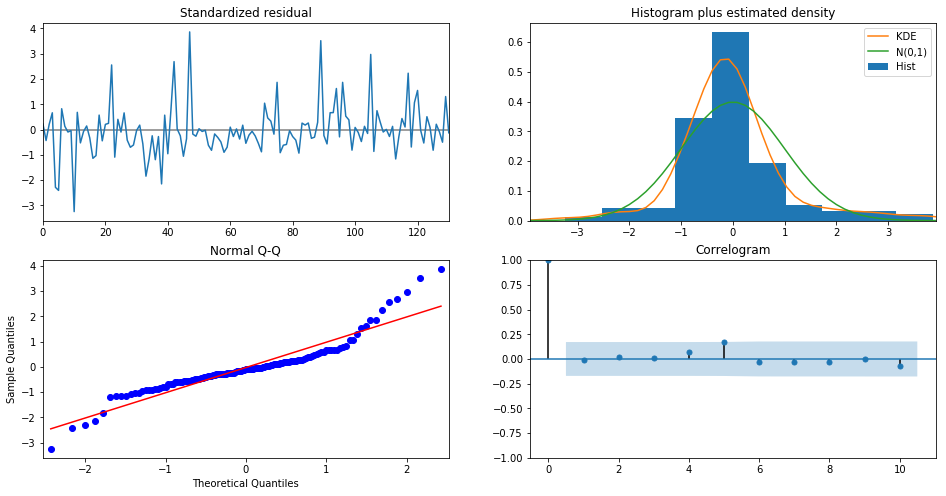

In [6]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Here we will forecast the values using the model. Can change starting point from which we need to forecast. For now we will keep starting point after 50 observations

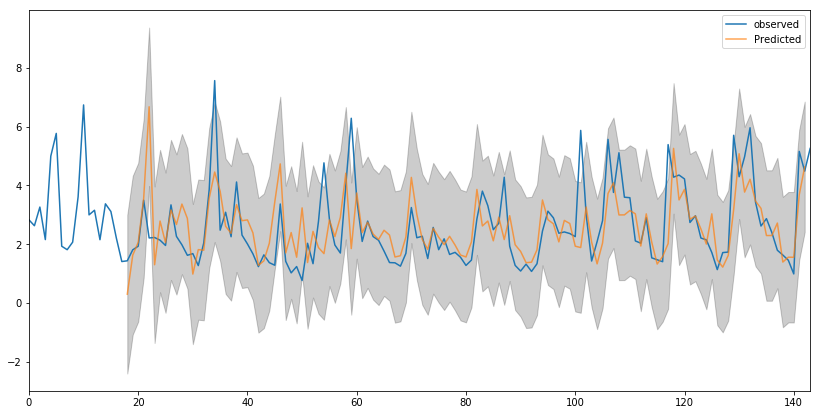

In [7]:
#Point from which prediction starts
start_point = 18
pred = results.get_prediction(start=start_point)
pred_ci = pred.conf_int()
ax = sales['Sum of Sales'][0:144].plot(label='observed',)
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

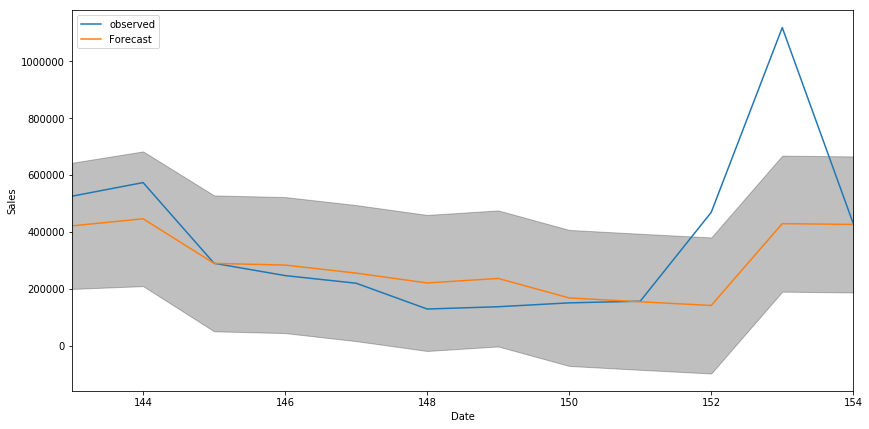

In [8]:
unscaled = sales['Sum of Sales']*100000
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = unscaled[143:].plot(label='observed', figsize=(14, 7))
pred_unscaled = pred_uc.predicted_mean*100000
pred_unscaled.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0]*100000,
                pred_ci.iloc[:, 1]*100000, color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

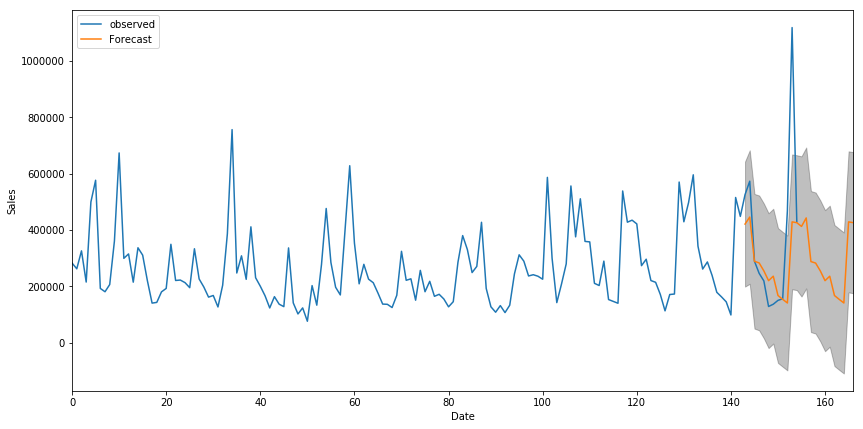

In [9]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = unscaled.plot(label='observed', figsize=(14, 7))
pred_unscaled = pred_uc.predicted_mean*100000
pred_unscaled.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0]*100000,
                pred_ci.iloc[:, 1]*100000, color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# Model Evaluation
 - Mean Absolute Percentage Error
 - Mean Absolute Error
 - BIAS
 - Mean Squared Error
 - Root Mean Squared Error

In [73]:
predictions = pred.predicted_mean
actual = train['Sum of Sales'][start_point:]
me.evaluate_model(predictions,actual)

			Model Performance

Mean Absolute Percentage Error: 0.32264932680202935

Mean Absolute Error: 0.7545863463556783

BIAS: -0.003387364496298517

Mean Squared Error: 0.001434279778847963

Root Mean Squared Error: 0.03787188639146409


In [74]:
test_prediction = results.forecast(steps=12)
test_actual = test['Sum of Sales']
me.evaluate_model(test_prediction,test_actual)

			Model Performance

Mean Absolute Percentage Error: 0.30200481828378695

Mean Absolute Error: 1.2791698029842877

BIAS: 0.8108675269717155

Mean Squared Error: 7.890073755566708

Root Mean Squared Error: 2.8089275098454762
